<a href="https://colab.research.google.com/github/zebamahat/machine-learning-practical/blob/main/jagdeshwari.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
# Data visualization
from matplotlib import pyplot as plot
import statsmodels.api as sm
import seaborn as sns


In [3]:
data = pd.read_csv('Housing.csv')

In [4]:
data.head(5)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [5]:
data.head(5)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [7]:
data.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [8]:
data.isnull().sum()

,0
price,0
area,0
bedrooms,0
bathrooms,0
stories,0
mainroad,0
guestroom,0
basement,0
hotwaterheating,0
airconditioning,0


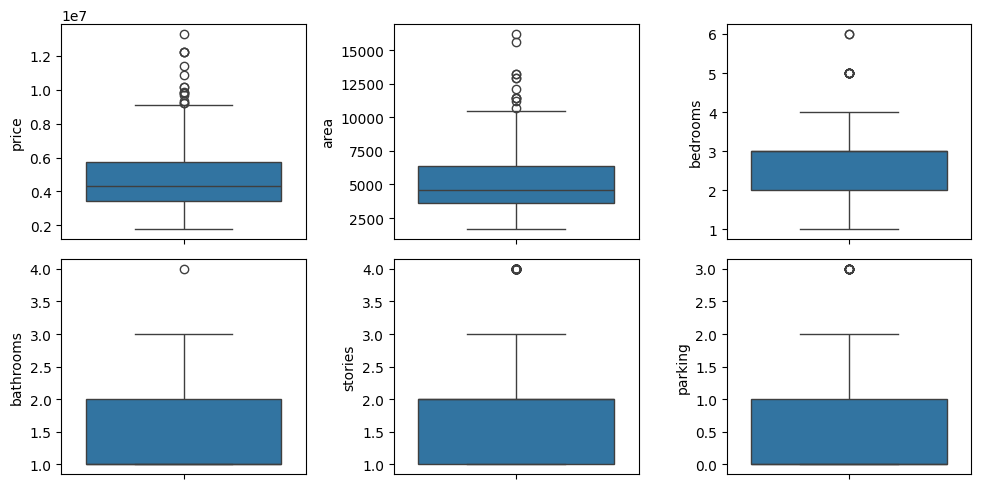

In [9]:
def detectOutliers():
    fig, axs = plot.subplots(2,3, figsize = (10,5))
    plt1 = sns.boxplot(data['price'], ax = axs[0,0])
    plt2 = sns.boxplot(data['area'], ax = axs[0,1])
    plt3 = sns.boxplot(data['bedrooms'], ax = axs[0,2])
    plt1 = sns.boxplot(data['bathrooms'], ax = axs[1,0])
    plt2 = sns.boxplot(data['stories'], ax = axs[1,1])
    plt3 = sns.boxplot(data['parking'], ax = axs[1,2])
    plot.tight_layout()
detectOutliers()

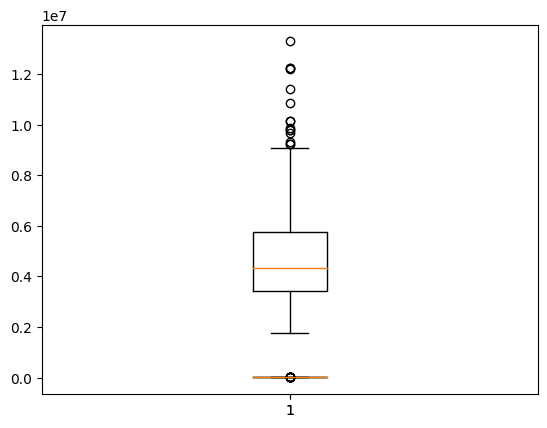

In [10]:
# Outlier reduction for price
plot.boxplot(data.price)
Q1 = data.price.quantile(0.25)
Q3 = data.price.quantile(0.75)
IQR = Q3 - Q1
data = data[(data.price >= Q1 - 1.5*IQR) & (data.price <= Q3 + 1.5*IQR)]
# Outlier reduction for area
plot.boxplot(data.area)
Q1 = data.area.quantile(0.25)
Q3 = data.area.quantile(0.75)
IQR = Q3 - Q1
data = data[(data.area >= Q1 - 1.5*IQR) & (data.area <= Q3 + 1.5*IQR)]

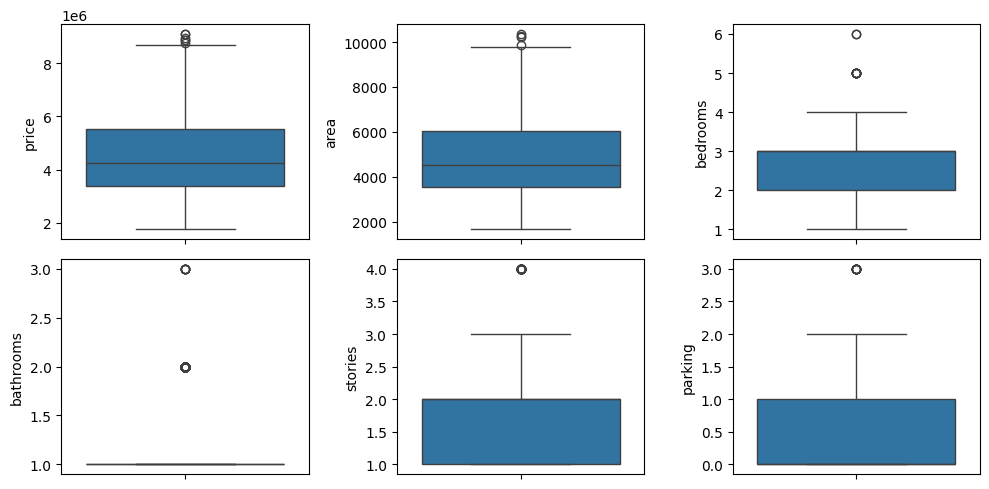

In [11]:
detectOutliers()

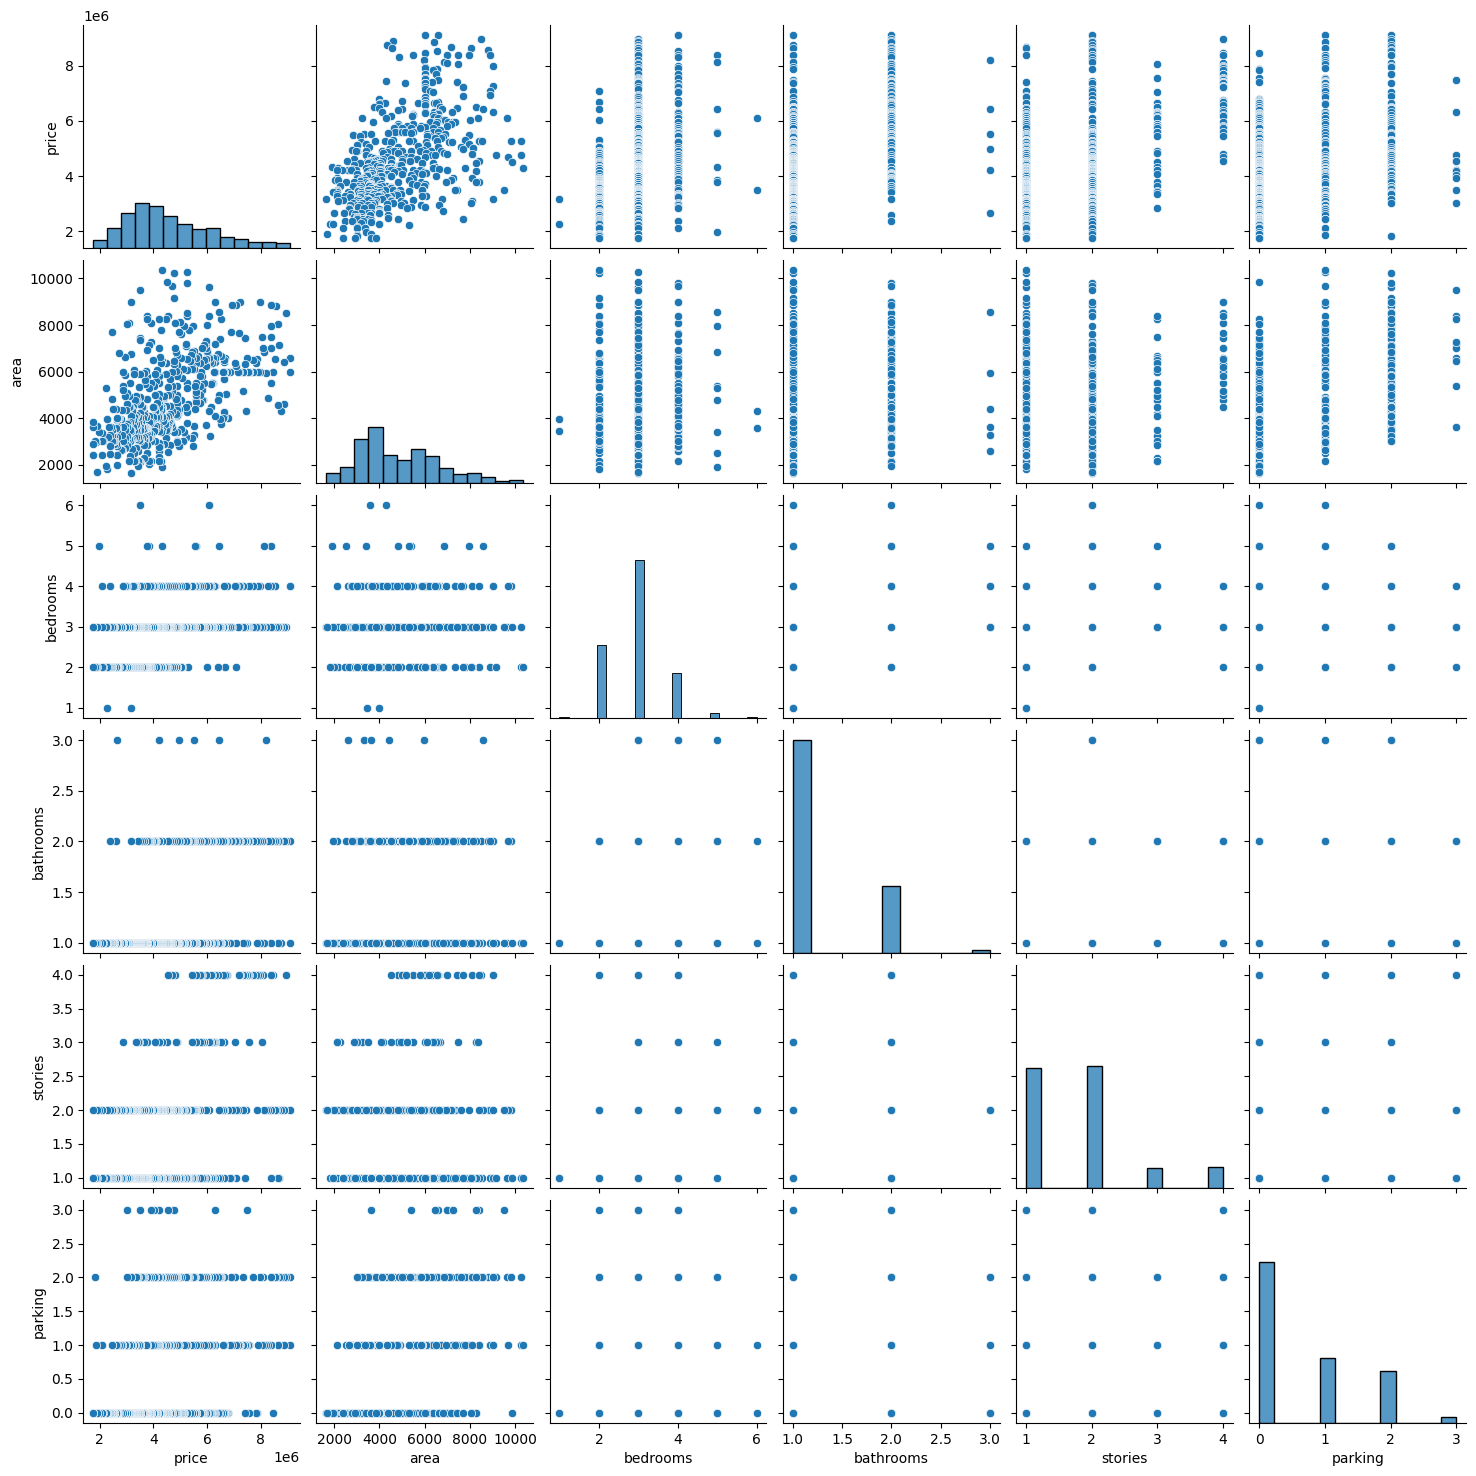

In [12]:
sns.pairplot(data)
plot.show()

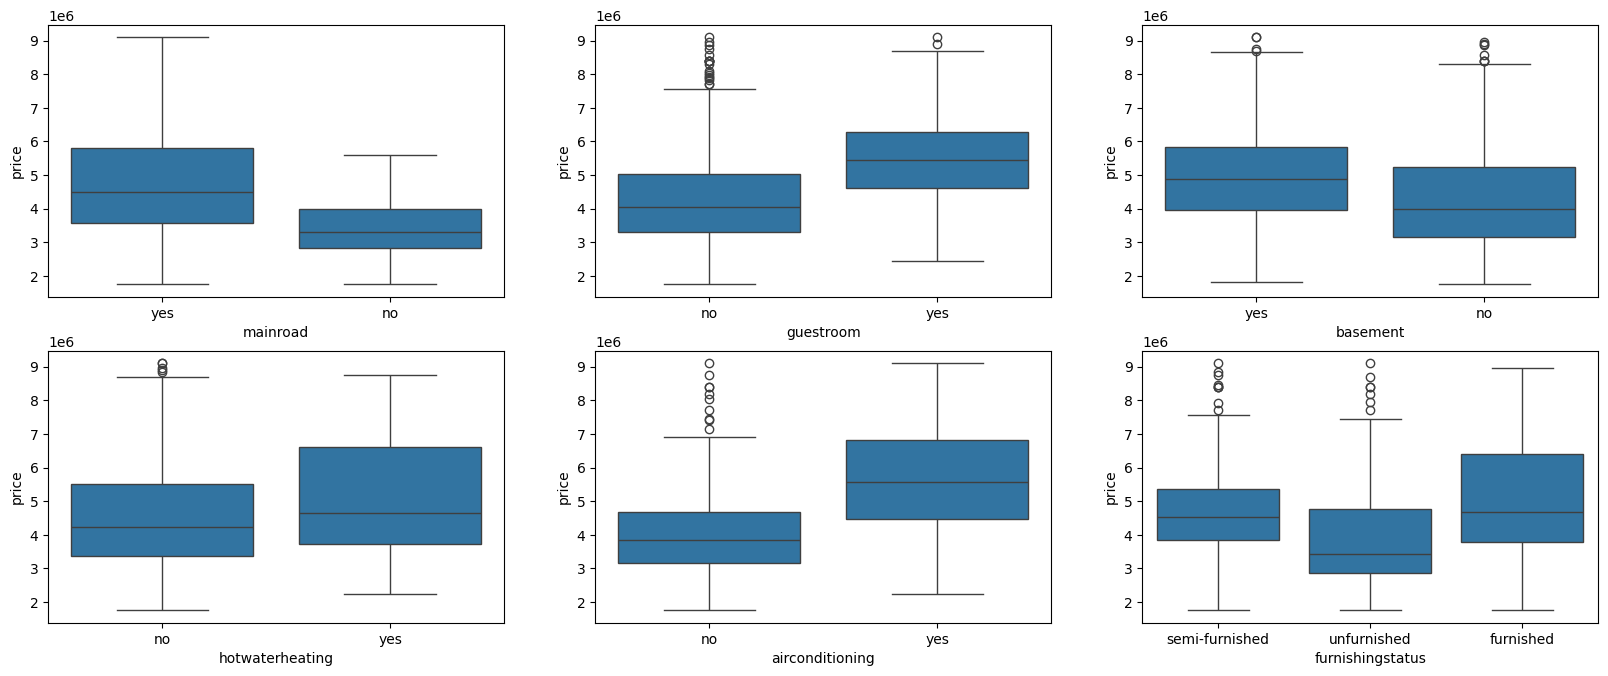

In [13]:
plot.figure(figsize=(20, 12))
plot.subplot(3,3,1)
sns.boxplot(x='mainroad', y='price', data=data)
plot.subplot(3,3,2)
sns.boxplot(x='guestroom', y='price', data=data)
plot.subplot(3,3,3)
sns.boxplot(x='basement', y='price', data=data)
plot.subplot(3,3,4)
sns.boxplot(x='hotwaterheating', y='price', data=data)
plot.subplot(3,3,5)
sns.boxplot(x='airconditioning', y='price', data=data)
plot.subplot(3,3,6)
sns.boxplot(x='furnishingstatus', y='price', data=data)
plot.show()

In [14]:
def toNumeric(x):
    return x.map({"no":0,"yes":1})
def convert_binary():
    for column in list(data.select_dtypes(['object']).columns):
        if(column != 'furnishingstatus'):
            data[[column]] = data[[column]].apply(toNumeric)
convert_binary()

In [15]:
data.head(5)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
15,9100000,6000,4,1,2,1,0,1,0,0,2,0,semi-furnished
16,9100000,6600,4,2,2,1,1,1,0,1,1,1,unfurnished
17,8960000,8500,3,2,4,1,0,0,0,1,2,0,furnished
18,8890000,4600,3,2,2,1,1,0,0,1,2,0,furnished
19,8855000,6420,3,2,2,1,0,0,0,1,1,1,semi-furnished


In [16]:
status = pd.get_dummies(data['furnishingstatus'])
status

,furnished,semi-furnished,unfurnished
15,False,True,False
16,False,False,True
17,True,False,False
18,True,False,False
19,False,True,False
...,...,...,...
540,False,False,True
541,False,True,False
542,False,False,True
543,True,False,False


In [17]:
status = pd.get_dummies(data['furnishingstatus'], drop_first=True)

In [18]:
data = pd.concat([data, status], axis=1)

In [19]:
data.drop(columns='furnishingstatus',inplace=True)

In [20]:
data.head(5)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
15,9100000,6000,4,1,2,1,0,1,0,0,2,0,True,False
16,9100000,6600,4,2,2,1,1,1,0,1,1,1,False,True
17,8960000,8500,3,2,4,1,0,0,0,1,2,0,False,False
18,8890000,4600,3,2,2,1,1,0,0,1,2,0,False,False
19,8855000,6420,3,2,2,1,0,0,0,1,1,1,True,False


In [21]:
Y = data.price
# includes the fields other than prices
X = data.iloc[:,1:]

In [22]:
from sklearn.preprocessing import MinMaxScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
def preprocessing(X):
    scaler = MinMaxScaler()
    X_scaled = scaler.fit_transform(X)
    variables = X_scaled
    vif = pd.DataFrame()
    vif["VIF"] = [variance_inflation_factor(variables, i) for i in range(variables.shape[1])]
    vif["Features"] = X.columns
    print(vif)

In [23]:
preprocessing(X)

         VIF         Features
0   5.695074             area
1   7.370649         bedrooms
2   1.640001        bathrooms
3   2.702247          stories
4   5.841277         mainroad
5   1.521360        guestroom
6   1.998402         basement
7   1.077140  hotwaterheating
8   1.745831  airconditioning
9   1.912748          parking
10  1.444422         prefarea
11  2.306936   semi-furnished
12  1.941835      unfurnished


In [24]:
X.head(5)

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
15,6000,4,1,2,1,0,1,0,0,2,0,True,False
16,6600,4,2,2,1,1,1,0,1,1,1,False,True
17,8500,3,2,4,1,0,0,0,1,2,0,False,False
18,4600,3,2,2,1,1,0,0,1,2,0,False,False
19,6420,3,2,2,1,0,0,0,1,1,1,True,False


In [25]:
Y.head(5)

,price
15,9100000
16,9100000
17,8960000
18,8890000
19,8855000


In [26]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.25,random_state=355)

In [27]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()
regression.fit(x_train,y_train)

LinearRegression()

In [28]:
y_predict = regression.predict(x_test)

Text(0, 0.5, 'y_pred')

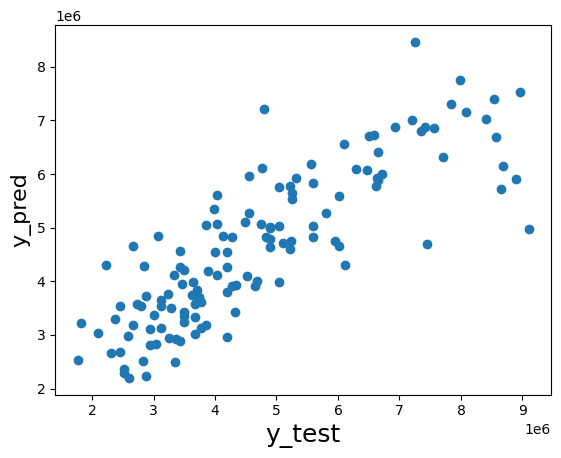

In [29]:
plot.scatter(y_test,y_predict)
plot.xlabel('y_test', fontsize=18)
plot.ylabel('y_pred', fontsize=16)

In [30]:
import statsmodels.api as sms
model_1 = sms.OLS(y_train, x_train.astype(float)).fit()
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.964
Model:                            OLS   Adj. R-squared (uncentered):              0.963
Method:                 Least Squares   F-statistic:                              770.2
Date:                Sat, 10 Aug 2024   Prob (F-statistic):                   1.08e-260
Time:                        05:32:30   Log-Likelihood:                         -5856.8
No. Observations:                 387   AIC:                                  1.174e+04
Df Residuals:                     374   BIC:                                  1.179e+04
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
area              259.8671     29.210      8.897      0.000     202.431     317.303
bedrooms         1.451e+05   6.39e+04      2.270      0.024    1.94e+04    2.71e+05
bathrooms        7.624e+05   1.09e+05      6.966      0.000    5.47e+05    9.78e+05
stories          4.609e+05   6.82e+04      6.759      0.000    3.27e+05    5.95e+05
mainroad         4.652e+05   1.33e+05      3.505      0.001    2.04e+05    7.26e+05
guestroom        2.405e+05   1.38e+05      1.746      0.082   -3.03e+04    5.11e+05
basement         3.212e+05   1.14e+05      2.814      0.005    9.67e+04    5.46e+05
hotwaterheating  9.051e+05   2.31e+05      3.920      0.000    4.51e+05    1.36e+06
airconditioning  7.924e+05   1.11e+05      7.113      0.000    5.73e+05    1.01e+06
parking          1.395e+05   6.18e+04      2.258      0.024     1.8e+04    2.61e+05
prefarea         5.914e+05   1.23e+05      4.809      0.000     3.5e+05    8.33e+05
semi-furnished   1.568e+05   1.14e+05      1.371      0.171   -6.81e+04    3.82e+05
unfurnished      -1.79e+05   1.17e+05     -1.529      0.127   -4.09e+05    5.13e+04
==============================================================================
Omnibus:                       22.233   Durbin-Watson:                   1.947
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               31.239
Skew:                           0.446   Prob(JB):                     1.65e-07
Kurtosis:                       4.069   Cond. No.                     2.57e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 2.57e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""